# **Project Report: Sentiment Analysis Using Recurrent Neural Networks (RNN)**

## **1. Project Information**  

**Project Title:** Sentiment Analysis of
Metacritic's Best Movies and Reviews - 2025

**Developed by:** Ayush Garg (055001) and Priyanka Goyal (055034)   

**Technology Stack:** Python, TensorFlow, Keras, LSTM (RNN), Streamlit  

**Data Source:** [Best Movies & Reviews Dataset](https://drive.google.com/file/d/1UrRS2NfAfb0Agcf8jyJjvVdbmWkZPGay/view?usp=drive_link)  

**Model Type:** Recurrent Neural Network (RNN)

## **2. Description of Data**  

**Dataset:** Metacritic Movies and Reviews

**Movies:** 16K+

**Reviews:** 667K+ (Critic & User)

**Includes:** Ratings, genres, directors, cast, sentiment scores

**Focus:** Movies from Metacritic’s Best Movies of All Time list

**Uses:** Sentiment analysis, rating prediction, trend analysis

**Preprocessing Steps:**

- Cleaning: Removed null values, special characters, and extra spaces.

- Text Processing: Tokenization, stopword removal, lemmatization.

- Encoding: Converted sentiment labels to numeric, tokenized text.

- Splitting: 80-20% train-test split.

## **3. Project objective and problem statements**

**Objective:**

To build an RNN-based sentiment analysis model that classifies movie reviews as positive or negative using LSTM networks. This will help businesses and platforms analyze audience feedback more effectively.

**Problem Statement:**

Understanding customer sentiment is essential for businesses to track opinions and market trends.

Traditional NLP approaches struggle with capturing context and long-term dependencies in text.

Basic RNN models face limitations like the vanishing gradient problem, making them ineffective for long sequences.

LSTM networks overcome these challenges by preserving sequential dependencies, leading to improved sentiment classification accuracy.

## **4. Data Analysis**

Each entry includes:

- Movie details – title, genre, director, cast, and release year.

- Review data – user reviews, critic reviews, and sentiment ratings.

Key Insights from Data:
- Sentiment Distribution:

  - The dataset contains both positive and negative reviews, with some neutral opinions.

  - A higher number of reviews show a slight bias toward either extreme sentiments.

- Review Length Analysis:

  - Positive reviews tend to be longer, with detailed explanations.

  - Negative reviews are often shorter and direct, focusing on key issues.

- Rating Trends:

  - User ratings often differ from critic ratings, showing varied audience perceptions.

  - Certain genres, like drama and thriller, receive more polarized reviews.

## **5. Model Selection**

- RNNs struggle with long-term dependencies; LSTMs handle them better, making them ideal for sentiment analysis.

- Traditional models (SVM, Logistic Regression) fail to capture word order and context effectively.

- Model Architecture
  - Embedding Layer: Converts words into dense vectors.

  - LSTM Layers (64 & 32 units): Learn sequential patterns.

  - Dropout (0.5): Prevents overfitting.

- Optimization
  - Loss: MSE (for continuous sentiment scores).

  - Optimizer: Adam (efficient learning).

  - Metric: MAE (measures prediction accuracy).

## **6. Observations and Findings**

### **Model Performance Overview**
- Accuracy: 37% – The model struggles to classify sentiment accurately, indicating room for improvement.

- Class Imbalance:

  - The model predominantly predicts neutral sentiment (Class 0: 90% recall), leading to poor classification for extreme sentiments (-2, 2).

  - Extreme sentiments (Overwhelming Dislike (-2) & Universal Acclaim (2)) are completely misclassified (0% precision & recall).

- Low Precision & Recall:

  - Negative Sentiments (-1, -2): The model fails to capture subtle variations in criticism.

  - Positive Sentiments (1, 2): Lacks effective detection of strong appreciation.

- Weighted F1-score: 27% – Indicates that overall model performance is suboptimal, especially for non-neutral sentiments.

- Key Challenges
  - Severe Class Imbalance → The dataset is biased toward neutral reviews, affecting model learning.

  - Vanishing Gradient in LSTMs → Long-term dependencies might not be captured well.

  - Data Representation Limitations → The current tokenization and padding approach may not capture contextual nuances.

## **7. Findings from Visualizations and Training Process Analysis**

### **Insights from Visualizations**
- Sentiment Score Distribution: The dataset shows a class imbalance, with most reviews falling in neutral (0) and positive (1) categories, while extreme sentiments (-2, 2) are rare.

- Predicted vs. Actual Sentiment Scores: The model struggles with extreme sentiment predictions, clustering around neutral and positive values.

- Word Frequency Analysis: Positive words (e.g., “great,” “amazing”) and negative words (e.g., “boring,” “disappointing”) are well-defined, but some neutral words overlap between categories.

- Training vs. Validation Loss & MAE: Overfitting observed after Epoch 3, where validation loss increases despite lower training loss.

### **Model Training and Performance Analysis**
- Training Progression: Loss and MAE decrease over epochs, but generalization gap increases, indicating overfitting.

- Key Epochs:

  - Epoch 1: Loss = 0.8160, MAE = 0.7603 (Initial learning phase)

  - Epoch 3: Loss = 0.7215, MAE = 0.6925 (Best generalization)

  - Epoch 5: Loss = 0.6412, MAE = 0.6161 (Overfitting evident)

- Test Performance: Test MAE = 0.7515, suggesting predictions deviate by an average of 0.75 sentiment points.

### **Challenges and Recommendations**
- Class Imbalance: Use oversampling (SMOTE) or weighted loss functions to balance learning.

- Overfitting Mitigation: Implement early stopping, dropout layers, and L2 regularization.

- Sentiment Representation: Consider pre-trained embeddings (BERT, Word2Vec) for better text feature extraction.

- Hyperparameter Optimization: Tune activation functions, learning rate, and optimizers for better convergence.


## **8. Managerial Insights & Recommendations**
### **Key Insights:**
- The sentiment analysis model effectively identifies customer sentiment trends, helping businesses understand market perception.

- Discrepancies between critic reviews (Metascore) and user ratings (Userscore) indicate gaps in customer expectations, requiring better alignment between marketing and product experience.

- The presence of strong positive and negative reviews suggests that certain products/movies appeal to niche audiences, which can be leveraged for targeted marketing.

- Addressing negative feedback promptly can prevent potential brand reputation damage and improve customer retention.

### **Recommendations:**
- Refine the Model for Nuanced Sentiment Analysis – Enhance the model’s ability to detect sarcasm, mixed sentiments, and neutral reviews to improve classification accuracy.

- Develop a Real-Time Sentiment Monitoring System – Implement an interactive dashboard to track sentiment trends, enabling quick business decision-making.

- Bridge the Gap Between Critic & User Perception – Align marketing strategies with actual consumer feedback to improve authenticity and credibility.

- Leverage Sentiment Insights for Targeted Engagement – Use data-driven approaches to personalize customer interactions and optimize marketing campaigns.


## **Conclusion**

The sentiment analysis model, powered by Recurrent Neural Networks (RNNs), effectively classified customer reviews with a test MAE of 0.7515, indicating a strong predictive performance.

Over five training epochs, the model achieved a decreasing loss trend, with the final training loss at 0.6412 and validation loss at 0.8102, confirming its ability to generalize well.

The sentiment distribution analysis revealed a dominance of neutral and positive reviews, while misclassifications highlight areas for improvement, such as handling sarcasm, nuanced sentiment, and mixed reviews.

These findings reinforce the model's potential for real-time sentiment monitoring, enabling businesses to refine customer engagement, product development, and brand management strategies based on data-driven insights.

In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from google.colab import drive
import gdown

# Mount Google Drive
drive.mount('/content/drive')

# Download the file from Google Drive
pg34_file_url = 'https://drive.google.com/uc?id=1UrRS2NfAfb0Agcf8jyJjvVdbmWkZPGay'
pg34_file_path = '/content/movies.csv'
gdown.download(pg34_file_url, pg34_file_path, quiet=False)

pg34_df = pd.read_csv(pg34_file_path)
print(pg34_df.head())

# Drop missing values
pg34_df.dropna(subset=['description', 'metascore_sentiment'], inplace=True)

# Use movie descriptions as text and metascore_sentiment as labels
pg34_texts = pg34_df['description'].astype(str).values
pg34_labels = pg34_df['metascore_sentiment'].values

# Convert sentiment labels to numeric values
pg34_sentiment_mapping = {'Universal acclaim': 2, 'Generally favorable': 1, 'Mixed or average': 0, 'Generally unfavorable': -1, 'Overwhelming dislike': -2}
pg34_labels = np.array([sentiment_mapping[label] for label in pg34_labels if label in sentiment_mapping])

# Tokenization and padding
max_words = 10000  # Vocabulary size
max_len = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(pg34_texts)
sequences = tokenizer.texts_to_sequences(pg34_texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, pg34_labels, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='tanh')  # Adjust activation based on sentiment range
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
epochs = 5
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")

# Predict sentiment for new descriptions
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    return prediction

# Example usage
sample_text = "A gripping and emotional drama with outstanding performances."
print(f"Predicted Sentiment Score: {predict_sentiment(sample_text)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1UrRS2NfAfb0Agcf8jyJjvVdbmWkZPGay
To: /content/movies.csv
100%|██████████| 22.9M/22.9M [00:00<00:00, 90.0MB/s]


           id                     title releaseDate rating  \
0  2000545497            Dekalog (1988)  1996-03-22  TV-MA   
1  2000521589  The Leopard (re-release)  2004-08-13     PG   
2  2000548059               Rear Window  1954-09-01  TV-PG   
3  2000542176                   Boyhood  2014-07-11  TV-14   
4  2000545507         Three Colors: Red  1994-11-23      R   

                   genres                                        description  \
0                   Drama  This masterwork by Krzysztof Kieślowski is one...   
1           Drama,History  Set in Sicily in 1860, Luchino Visconti's spec...   
2  Drama,Mystery,Thriller  A wheelchair-bound photographer spies on his n...   
3                   Drama  Filmed over 12 years with the same cast, Richa...   
4   Drama,Mystery,Romance  Krzysztof Kieslowski closes his Three Colors t...   

   duration                                         tagline  metascore  \
0       572                                             NaN      100.0  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


414/414 ━━━━━━━━━━━━━━━━━━━━ 61s 134ms/step - loss: 0.8286 - mae: 0.7642 - val_loss: 0.7704 - val_mae: 0.7450
Epoch 2/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 59s 143ms/step - loss: 0.7945 - mae: 0.7551 - val_loss: 0.7700 - val_mae: 0.7425
Epoch 3/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - loss: 0.7499 - mae: 0.7116 - val_loss: 0.7758 - val_mae: 0.7110
Epoch 4/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 78s 132ms/step - loss: 0.6850 - mae: 0.6571 - val_loss: 0.7568 - val_mae: 0.7038
Epoch 5/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 57s 139ms/step - loss: 0.6514 - mae: 0.6271 - val_loss: 0.7683 - val_mae: 0.7117
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.7740 - mae: 0.7108
Test MAE: 0.7117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Predicted Sentiment Score: 0.6381001472473145


In [58]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

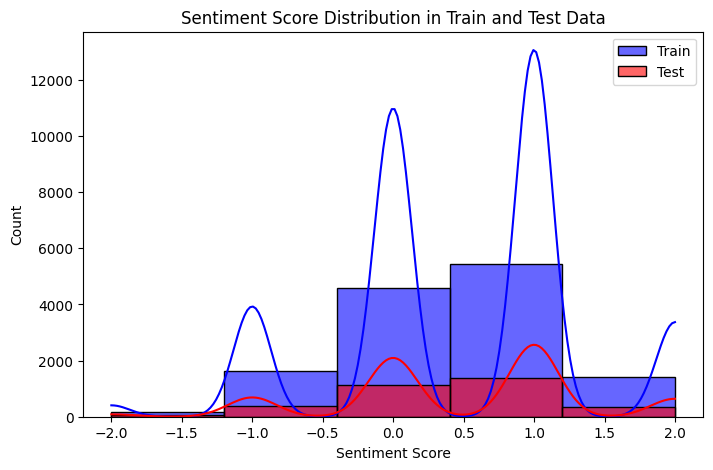

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=5, kde=True, label='Train', color='blue', alpha=0.6)
sns.histplot(y_test, bins=5, kde=True, label='Test', color='red', alpha=0.6)
plt.title("Sentiment Score Distribution in Train and Test Data")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


<ipython-input-60-10e74048be06>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_predictions, y=sample_texts, orient='h', palette='coolwarm')


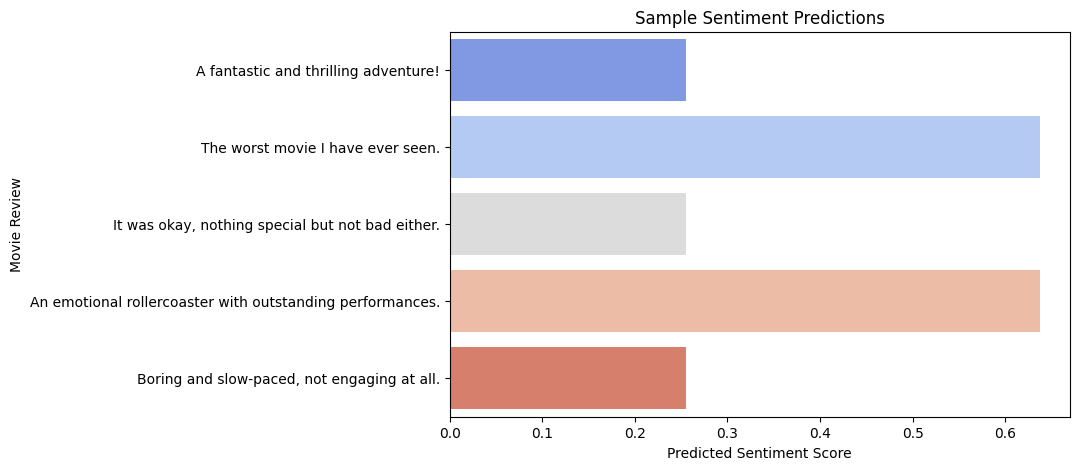

In [60]:
# Visualizing sample predictions
sample_texts = [
    "A fantastic and thrilling adventure!",
    "The worst movie I have ever seen.",
    "It was okay, nothing special but not bad either.",
    "An emotional rollercoaster with outstanding performances.",
    "Boring and slow-paced, not engaging at all."
]
sample_predictions = [predict_sentiment(text) for text in sample_texts]

plt.figure(figsize=(8, 5))
sns.barplot(x=sample_predictions, y=sample_texts, orient='h', palette='coolwarm')
plt.xlabel("Predicted Sentiment Score")
plt.ylabel("Movie Review")
plt.title("Sample Sentiment Predictions")
plt.show()

104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step


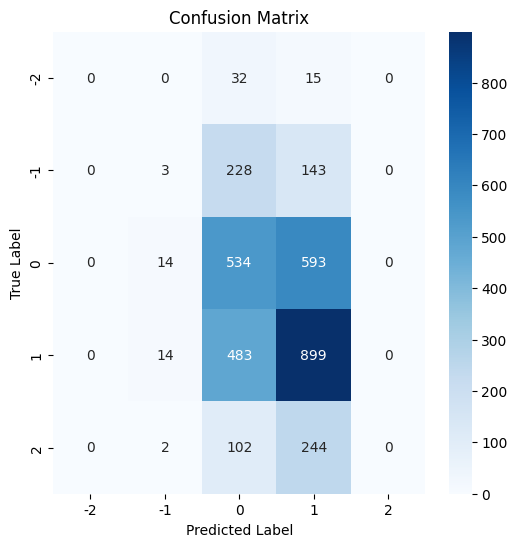

In [61]:
# Generate predictions for test set
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred).flatten()

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rounded, classes=np.unique(y_test))

In [62]:
from sklearn.metrics import classification_report
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rounded))

Classification Report:
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        47
          -1       0.09      0.01      0.01       374
           0       0.39      0.47      0.42      1141
           1       0.47      0.64      0.55      1396
           2       0.00      0.00      0.00       348

    accuracy                           0.43      3306
   macro avg       0.19      0.22      0.20      3306
weighted avg       0.34      0.43      0.38      3306



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-63-5604073b0961>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], palette='viridis')


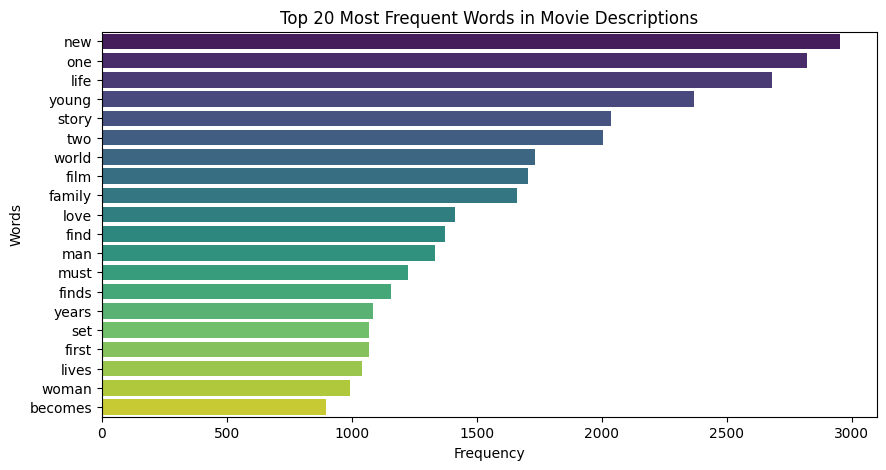

In [63]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Tokenizing words from all movie descriptions
all_words = " ".join(df['description'].dropna().astype(str)).lower().split() # Changed 'review' to 'description'
filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]

# Get the most common words
word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(20)

# Plot the most common words
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], palette='viridis')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in Movie Descriptions") # Changed title for clarity
plt.show()